In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import datetime as dt
# from sklearn.preprocessing import Imputer

%matplotlib inline

# Load the data and merge the two sheets into one
This section merges and primarily cleans the dataset, genertaing whole_dataset.csv where further operations can be done.


In [2]:
# read the first sheet
bank_df_earlier = pd.read_excel(r'remittances_dataset_2011_2023_q3_1.xlsx', sheet_name='Dataset (up to Q1 2016)')

In [3]:
# read the second sheet
bank_df_later = pd.read_excel(r'remittances_dataset_2011_2023_q3_1.xlsx', sheet_name='Dataset (from Q2 2016)')


In [4]:
# merge the two sheets
bank_df_whole = pd.concat([bank_df_earlier, bank_df_later], axis=0)

Let us see the new, merged dataframe.

In [5]:
# shape and missing values
print(bank_df_whole.shape)
bank_df_whole.isna().sum(axis=0)

(205179, 47)


id                                 0
period                             0
source_code                        0
source_name                        0
source_region                      0
source_income                      0
source_lending                     0
source_G8G20                       0
destination_code                   0
destination_name                   0
destination_region                 0
destination_income                 0
destination_lending                0
destination_G8G20                  0
firm                               0
firm_type                          0
product                       155902
sending location              155688
speed actual                      10
cc1 lcu amount                   103
cc1 denomination amount           80
cc1 lcu code                       1
cc1 lcu fee                       23
cc1 lcu fx rate                   16
cc1 fx margin                     13
cc1 total cost %                  12
cc2 lcu amount                     1
c

In [6]:
bank_df_whole.duplicated().sum() # No duplicates

0

In [7]:
# dropping columns with more than 80% NAs
thresh = int(bank_df_whole.shape[0] * 0.8)
bank_df_whole = bank_df_whole.dropna(axis=1, thresh=thresh)

In [8]:
# checking shape, NAs after first dropping
print(bank_df_whole.shape)
bank_df_whole.isna().sum(axis=0)

(205179, 35)


id                            0
period                        0
source_code                   0
source_name                   0
source_region                 0
source_income                 0
source_lending                0
source_G8G20                  0
destination_code              0
destination_name              0
destination_region            0
destination_income            0
destination_lending           0
destination_G8G20             0
firm                          0
firm_type                     0
speed actual                 10
cc1 lcu amount              103
cc1 denomination amount      80
cc1 lcu code                  1
cc1 lcu fee                  23
cc1 lcu fx rate              16
cc1 fx margin                13
cc1 total cost %             12
cc2 lcu amount                1
cc2 denomination amount      78
cc2 lcu code                  4
cc2 lcu fee                 999
cc2 lcu fx rate            1086
cc2 fx margin               977
cc2 total cost %            978
inter lc

In [9]:
list_of_columns = list(bank_df_whole.columns)
list_of_columns_no_cc2 = [name for name in list_of_columns if not name.startswith('cc2') ]

In [10]:
# Here we get the entire dataframe without cc2
bank_df_whole_no_cc2 = bank_df_whole[list_of_columns_no_cc2]

In [11]:
# Let's get rid of the columns that may leak information about price 
columns_comprising_price = ['cc1 lcu fee', 'cc1 lcu fx rate', 'cc1 fx margin']
bank_df_whole_no_cc2.drop(columns_comprising_price, axis= 'columns', inplace=True)

/var/folders/k8/ltw6mcfj23ndd4m6h12lm7fh0000gn/T/ipykernel_64647/568294598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_whole_no_cc2.drop(columns_comprising_price, axis= 'columns', inplace=True)


In [12]:
# Let's get rid of repetitive columns
repetitive_columns = ['source_code', 'destination_code']
bank_df_whole_no_cc2.drop(repetitive_columns, axis= 'columns', inplace=True)

/var/folders/k8/ltw6mcfj23ndd4m6h12lm7fh0000gn/T/ipykernel_64647/1777470948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_whole_no_cc2.drop(repetitive_columns, axis= 'columns', inplace=True)


In [13]:
# Export it as whole_dataset
bank_df_whole_no_cc2.to_csv('whole_dataset.csv', index=False)

In [14]:
interbank_ex = bank_df_whole_no_cc2.groupby(['corridor', 'period'])['inter lcu bank fx'].agg('mean')

In [15]:
interbank_ex

corridor  period 
AGONAM    2016_2Q    0.393867
          2016_3Q    0.313750
          2016_4Q    0.312738
          2017_1Q    0.081150
          2017_2Q    0.078300
                       ...   
ZAFZWE    2022_3Q    0.059289
          2022_4Q    0.058767
          2023_1Q    0.054779
          2023_2Q    0.051267
          2023_3Q    0.053112
Name: inter lcu bank fx, Length: 14763, dtype: float64

In [16]:
interbank_ex.loc[interbank_ex.index.levels[0][0]]

period
2016_2Q    0.393867
2016_3Q    0.313750
2016_4Q    0.312738
2017_1Q    0.081150
2017_2Q    0.078300
2017_3Q    0.385540
2017_4Q    0.390233
2018_1Q    0.370153
2018_2Q    0.368927
2018_3Q    0.683853
2018_4Q    0.363573
2019_1Q    0.362000
2019_2Q    0.363120
2019_3Q    0.359853
2019_4Q    0.353440
2020_1Q    0.030140
2020_2Q    0.033540
2020_3Q    0.029300
2020_4Q    0.024590
2021_1Q    0.511920
2021_2Q    0.021100
2021_3Q    0.023200
2021_4Q    0.027300
2022_1Q    0.031050
2022_2Q    0.037700
2022_3Q    0.039950
2022_4Q    0.034050
2023_1Q    0.036050
2023_2Q    0.034050
2023_3Q    0.022550
Name: inter lcu bank fx, dtype: float64

# Making time series for firms

In [17]:
# Drop date of collection and unique id
time_series_df = bank_df_whole_no_cc2.drop(['date', 'id'], axis=1)


In [18]:
# Creates a dataframe of corridor, period, firm, and the mean of the cost of the firm in this corridor of the period - because one firm may have different means of payment
temporary_df = time_series_df.groupby(['corridor', 'period', 'firm'])['cc1 total cost %'].agg('mean')
temporary_df = temporary_df.reset_index()

In [19]:
# changes all quarter entries to datetime entries
# Define a corrected conversion function that includes error handling
def convert_period_to_timestamp_corrected(period):
    try:
        year, quarter = period.split('_')
        quarter_to_month = {'1Q': '01-01', '2Q': '04-01', '3Q': '07-01', '4Q': '10-01'}
        return pd.to_datetime(f"{year}-{quarter_to_month[quarter]}")
    except KeyError:
        # In case of an unexpected format, we'll return a generic date for now
        return pd.to_datetime("1900-01-01")

# Apply the corrected function
temporary_df['timestamp'] = temporary_df['period'].apply(convert_period_to_timestamp_corrected)

# Check for any conversions that resulted in the generic '1900-01-01' date to understand the issue better
temporary_df[temporary_df['timestamp'] == '1900-01-01']['period'].unique()


array([], dtype=object)

In [20]:
# Now that the timestamp conversion issue is resolved, let's pivot the table again
# This time we should successfully create a dataframe with timestamps as rows and multi-level columns for corridors and firms

df_pivoted_firm_timeseries = temporary_df.pivot_table(index='timestamp', columns=['corridor', 'firm'], values='cc1 total cost %', aggfunc='mean')

df_pivoted_firm_timeseries


corridor        AGONAM                                                      \
firm       HM Transfer MoneyGram Real Transfer Standard Bank Western Union   
timestamp                                                                    
2011-01-01         NaN       NaN           NaN           NaN           NaN   
2011-07-01         NaN       NaN           NaN           NaN           NaN   
2012-01-01         NaN       NaN           NaN           NaN           NaN   
2012-07-01         NaN       NaN           NaN           NaN           NaN   
2013-01-01         NaN       NaN           NaN           NaN           NaN   
2013-04-01         NaN       NaN           NaN           NaN           NaN   
2013-07-01         NaN       NaN           NaN           NaN           NaN   
2013-10-01         NaN       NaN           NaN           NaN           NaN   
2014-01-01         NaN       NaN           NaN           NaN           NaN   
2014-04-01         NaN       NaN           NaN           NaN           NaN   
2014-07-01         NaN       NaN           NaN           NaN           NaN   
2014-10-01         NaN       NaN           NaN           NaN           NaN   
2015-01-01         NaN       NaN           NaN           NaN           NaN   
2015-04-01         NaN       NaN           NaN           NaN           NaN   
2015-07-01         NaN       NaN           NaN           NaN           NaN   
2015-10-01         NaN       NaN           NaN           NaN           NaN   
2016-01-01         NaN       NaN           NaN           NaN           NaN   
2016-04-01         NaN     16.28         14.19          27.5           NaN   
2016-07-01         NaN     23.61         12.05          27.5         14.40   
2016-10-01         NaN     27.74         29.84          27.5         21.95   
2017-01-01         NaN     24.87         32.92           NaN         21.10   
2017-04-01         NaN     24.49         27.96           NaN         21.57   
2017-07-01         NaN     27.19          9.70           NaN         28.10   
2017-10-01         NaN     27.24          9.70           NaN         27.24   
2018-01-01         NaN     27.68          9.70           NaN         20.08   
2018-04-01         NaN     26.38          9.70           NaN         28.20   
2018-07-01         NaN     26.94          9.70           NaN         10.61   
2018-10-01         NaN     27.89          9.70           NaN         29.71   
2019-01-01         NaN     28.33          9.70           NaN         17.29   
2019-04-01         NaN     20.41          9.70           NaN         15.57   
2019-07-01         NaN     15.81          9.70           NaN         16.30   
2019-10-01         NaN     34.73          9.70           NaN         17.47   
2020-01-01         NaN     19.21           NaN           NaN         16.10   
2020-04-01         NaN     21.13           NaN           NaN         17.45   
2020-07-01         NaN     20.04           NaN           NaN         18.14   
2020-10-01         NaN     23.38           NaN           NaN         22.27   
2021-01-01         NaN     20.71           NaN           NaN         11.75   
2021-04-01         NaN       NaN           NaN           NaN         13.59   
2021-07-01       16.86       NaN           NaN           NaN          8.49   
2021-10-01       14.50       NaN           NaN           NaN           NaN   
2022-01-01       23.83       NaN           NaN           NaN         20.75   
2022-04-01         NaN       NaN           NaN           NaN         17.11   
2022-07-01         NaN     27.49           NaN           NaN         25.18   
2022-10-01         NaN     12.90           NaN           NaN          9.67   
2023-01-01         NaN     13.12           NaN           NaN         12.27   
2023-04-01         NaN      9.52           NaN           NaN         10.74   
2023-07-01         NaN     11.37           NaN           NaN         11.18   

corridor      AREBGD                                                ...  \
firm       Al Ansari Al 

In [21]:
# Assuming `df` is your DataFrame with the timestamp as the index
df_pivoted_firm_timeseries.index = pd.to_datetime(df_pivoted_firm_timeseries.index)  # Make sure the index is in DateTime format
df_pivoted_firm_timeseries = df_pivoted_firm_timeseries[df_pivoted_firm_timeseries.index.year > 2012]  # Keep only the data from after 2012


## Missing value analysis

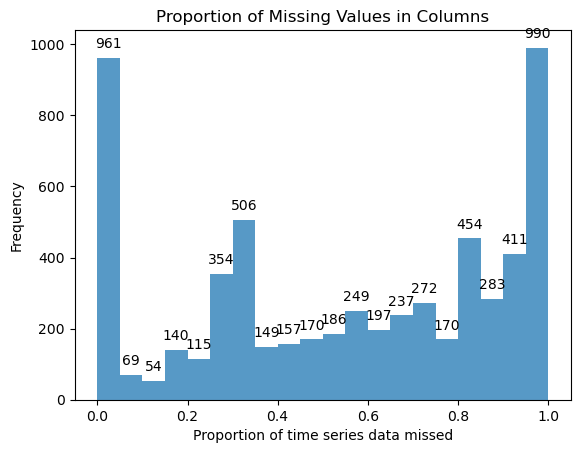

In [22]:
# Visualise the distribution of the NAs in bar chart

import matplotlib.pyplot as plt
# Calculate proportion of missing values in each column
missing_proportions = df_pivoted_firm_timeseries.isnull().sum(axis=0) / df_pivoted_firm_timeseries.shape[0]

# Create the histogram with bins of width 0.05
ax = missing_proportions.plot.hist(bins=np.arange(0, 1.05, 0.05), alpha=0.75)

# Title and labels
plt.title("Proportion of Missing Values in Columns")
plt.xlabel('Proportion of time series data missed')

# Annotate each bar with its count
for rect in ax.patches:
    height = rect.get_height()
    if height > 0: # To avoid annotating bars with height 0
        ax.annotate(f'{int(height)}',
                    (rect.get_x() + rect.get_width() / 2, height),
                    textcoords="offset points",
                    xytext=(0,5),
                    ha='center', 
                    va='bottom')

plt.show()


In [23]:
df_pivoted_firm_timeseries.index = pd.DatetimeIndex(df_pivoted_firm_timeseries.index, freq='QS')

In [24]:
df_pivoted_firm_timeseries.index

DatetimeIndex(['2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01', '2023-04-01', '2023-07-01'],
              dtype='datetime64[ns]', name='timestamp', freq='QS-JAN')

filtered_df_adjusted is a dataframe of time series. It only Includes timeseries with more than 80% data and series with values below 0.01 are excluded.

In [26]:
# It selects row/time-series that are complete or lack the left part consecutively only
def is_consecutive_na_or_no_na(series):
    # If the series has no NAs at all, include it
    if series.isna().sum() == 0:
        return True
    # Find the first and last non-NA index
    first_non_na_index = series.first_valid_index()
    last_non_na_index = series.last_valid_index()
    # If no non-NA found, it's all NAs, considered consecutive from start
    if first_non_na_index is None:
        return True
    # Check if all values before the first non-NA are indeed NAs
    # and all values after the last non-NA are indeed NAs (if any)
    return series[first_non_na_index:].notna().all()


In [27]:

# Apply the adjusted filter
filtered_df = df_pivoted_firm_timeseries.transpose()[np.where((missing_proportions == 0), True, False)]
filtered_df_adjusted =filtered_df[filtered_df.apply(is_consecutive_na_or_no_na, axis=1)]

# exclude rows with values less than 0.01
filtered_df_adjusted = filtered_df_adjusted[~filtered_df_adjusted.transpose().lt(0.01).any(axis='index')]

In [33]:
filtered_df_adjusted.describe().transpose().describe()

,count,mean,std,min,25%,50%,75%,max
count,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,774.0,8.274645,5.428780,0.497442,4.629578,6.771252,10.241476,35.864070
std,0.0,0.539180,0.466168,0.339519,0.550781,0.775957,0.924420,7.555779
min,774.0,7.253314,4.946325,0.020000,3.527000,5.297500,8.746667,28.380000
25%,774.0,7.736878,5.127679,0.280000,4.047500,5.965250,9.192375,29.790000
50%,774.0,8.375738,5.232399,0.430000,4.842500,7.118333,10.430000,34.570000
75%,774.0,8.634559,5.594078,0.640000,5.000000,7.286667,10.943750,39.510000
max,774.0,9.240630,6.706751,1.605000,5.551250,7.987500,11.858750,65.400000


In [28]:
filtered_df_adjusted.shape

(774, 43)

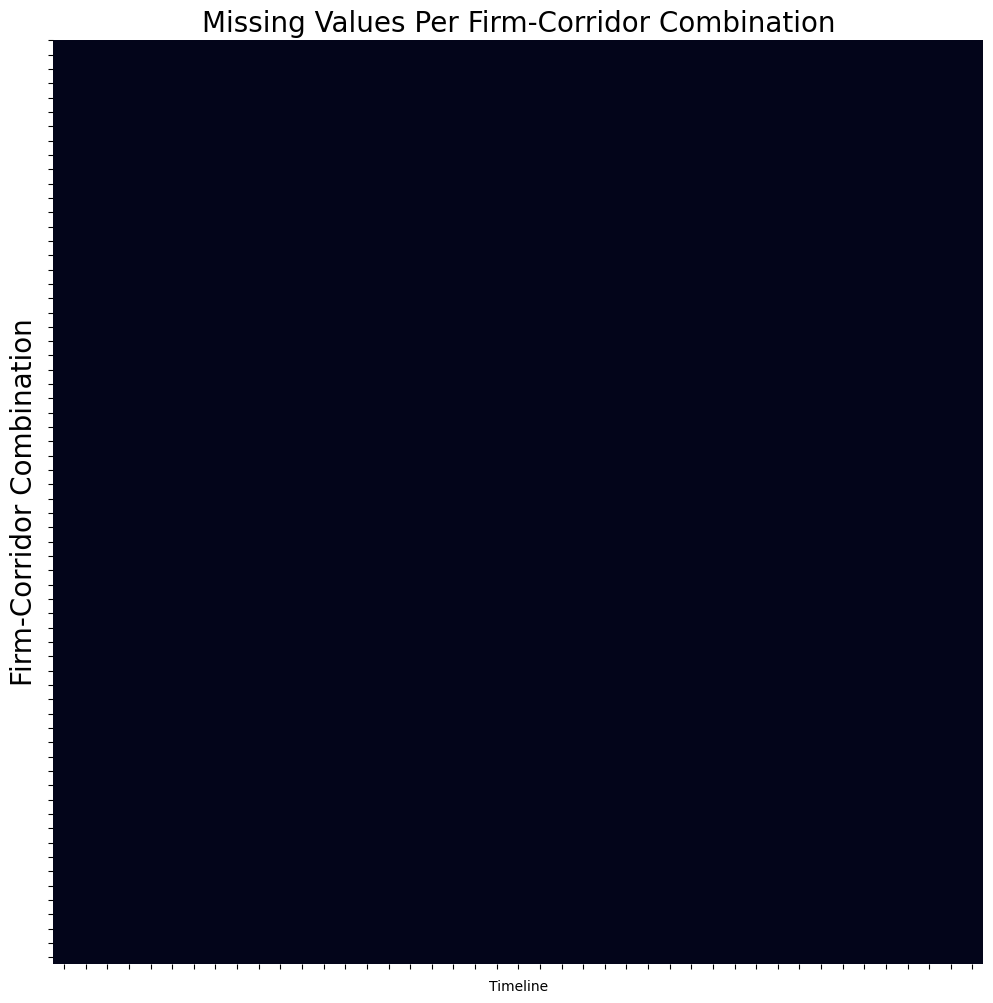

In [112]:
# visualise the missing valuen situation now to see if we have what we want - yes!
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(filtered_df_adjusted.isna(), cbar=False, ax=ax)
plt.title('Missing Values Per Firm-Corridor Combination', fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel('Timeline', fontsize = 10) 
plt.ylabel('Firm-Corridor Combination', fontsize = 20)
plt.show()

In [113]:
filtered_df_adjusted.index.get_level_values('corridor').nunique() # There are 206 corridors out of totally 381 corridors

199

In [114]:
df_pivoted_firm_timeseries.transpose().index.get_level_values('corridor').nunique()

381

In [34]:
filtered_df_adjusted.reset_index(inplace=True)


In [35]:
filtered_df_adjusted_copy =  filtered_df_adjusted.copy()
filtered_df_adjusted_copy['firm-corridor'] = filtered_df_adjusted_copy['firm'] + ' ' + filtered_df_adjusted_copy['corridor']
filtered_df_adjusted_copy = filtered_df_adjusted_copy.drop(['firm','corridor'], axis='columns').set_index('firm-corridor')
filtered_df_adjusted_copy

timestamp,2013-01-01,2013-04-01,2013-07-01,2013-10-01,2014-01-01,2014-04-01,2014-07-01,2014-10-01,2015-01-01,2015-04-01,...,2021-04-01,2021-07-01,2021-10-01,2022-01-01,2022-04-01,2022-07-01,2022-10-01,2023-01-01,2023-04-01,2023-07-01
firm-corridor,,,,,,,,,,,,,,,,,,,,,
Al Ansari AREEGY,3.640,5.230,2.910,3.26,3.940,3.575,3.91,3.920,3.82,3.770,...,3.130000,2.973333,3.600,3.480,3.150000,3.090000,2.470000,2.970000,2.390000,2.180000
Al Fardan Exchange AREEGY,4.185,3.190,3.805,4.09,4.055,4.625,4.34,3.885,4.92,4.775,...,4.625000,11.636667,12.130,16.445,3.060000,2.903333,3.320000,2.730000,2.336667,2.530000
MoneyGram AREEGY,4.280,2.070,2.500,2.51,4.470,2.780,2.78,2.140,3.51,3.510,...,3.550000,3.580000,3.560,3.550,5.840000,4.860000,5.690000,5.160000,3.690000,3.690000
Wall St Exchange AREEGY,3.570,3.420,4.790,6.45,3.410,4.440,3.58,2.900,3.34,3.290,...,3.310000,5.320000,3.960,4.010,3.450000,3.080000,3.050000,2.780000,2.680000,2.650000
Western Union AREEGY,6.020,4.790,4.960,4.97,5.860,5.770,5.77,5.130,6.50,7.790,...,3.495000,3.400000,4.030,3.980,3.700000,3.730000,3.655000,3.720000,3.765000,3.665000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
First National Bank of South Africa ZAFZWE,18.400,18.370,19.070,20.02,19.210,18.530,18.97,13.060,12.75,13.085,...,27.405000,26.725000,26.855,27.220,29.083333,32.695000,35.586667,35.803333,44.953333,15.773333
Mukuru ZAFZWE,14.820,12.955,14.620,12.20,15.495,13.565,10.95,18.320,19.24,10.770,...,8.920000,10.475000,9.065,8.905,11.050000,9.320000,10.423333,10.141111,8.616429,11.991429
Nedbank ZAFZWE,18.230,17.370,19.050,18.14,18.770,18.790,18.78,18.250,18.34,19.880,...,15.810000,15.400000,15.180,25.460,25.370000,25.520000,25.450000,30.680000,22.840000,30.790000


In [36]:
filtered_df_adjusted

timestamp,corridor,firm,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-07-01 00:00:00,2013-10-01 00:00:00,2014-01-01 00:00:00,2014-04-01 00:00:00,2014-07-01 00:00:00,2014-10-01 00:00:00,...,2021-04-01 00:00:00,2021-07-01 00:00:00,2021-10-01 00:00:00,2022-01-01 00:00:00,2022-04-01 00:00:00,2022-07-01 00:00:00,2022-10-01 00:00:00,2023-01-01 00:00:00,2023-04-01 00:00:00,2023-07-01 00:00:00
0,AREEGY,Al Ansari,3.640,5.230,2.910,3.26,3.940,3.575,3.91,3.920,...,3.130000,2.973333,3.600,3.480,3.150000,3.090000,2.470000,2.970000,2.390000,2.180000
1,AREEGY,Al Fardan Exchange,4.185,3.190,3.805,4.09,4.055,4.625,4.34,3.885,...,4.625000,11.636667,12.130,16.445,3.060000,2.903333,3.320000,2.730000,2.336667,2.530000
2,AREEGY,MoneyGram,4.280,2.070,2.500,2.51,4.470,2.780,2.78,2.140,...,3.550000,3.580000,3.560,3.550,5.840000,4.860000,5.690000,5.160000,3.690000,3.690000
3,AREEGY,Wall St Exchange,3.570,3.420,4.790,6.45,3.410,4.440,3.58,2.900,...,3.310000,5.320000,3.960,4.010,3.450000,3.080000,3.050000,2.780000,2.680000,2.650000
4,AREEGY,Western Union,6.020,4.790,4.960,4.97,5.860,5.770,5.77,5.130,...,3.495000,3.400000,4.030,3.980,3.700000,3.730000,3.655000,3.720000,3.765000,3.665000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,ZAFZWE,First National Bank of South Africa,18.400,18.370,19.070,20.02,19.210,18.530,18.97,13.060,...,27.405000,26.725000,26.855,27.220,29.083333,32.695000,35.586667,35.803333,44.953333,15.773333
770,ZAFZWE,Mukuru,14.820,12.955,14.620,12.20,15.495,13.565,10.95,18.320,...,8.920000,10.475000,9.065,8.905,11.050000,9.320000,10.423333,10.141111,8.616429,11.991429
771,ZAFZWE,Nedbank,18.230,17.370,19.050,18.14,18.770,18.790,18.78,18.250,...,15.810000,15.400000,15.180,25.460,25.370000,25.520000,25.450000,30.680000,22.840000,30.790000
772,ZAFZWE,Standard Bank,18.210,17.700,18.170,18.49,18.460,18.200,18.46,18.570,...,13.720000,13.910000,13.660,25.230,25.260000,24.520000,25.070000,27.370000,27.520000,26.070000


In [118]:
filtered_df_adjusted.to_csv('time_series_thesis.csv', index=False)

## Statistical exploration of the dataframe to be used

In [78]:
summary_stats = filtered_df_adjusted_copy.transpose().describe()
summary_stats = summary_stats.transpose()
summary_stats['stability'] = summary_stats['std']/summary_stats['mean']
summary_stats['stability'].sort_values()

firm-corridor
Kiwibank NZLVNM                               0.031269
ASB Bank NZLVNM                               0.034272
Seven Bank JPNIND                             0.043388
Girosol USAECU                                0.048236
Xoom USASLV                                   0.049286
                                                ...   
Wells Fargo USAIND                            0.797070
Western Union SGPBGD                          0.807452
Agrani Exchange House (Agrani Bank) SGPBGD    0.888465
Al-Rajhi Bank MYSBGD                          0.945326
MoneyGram MYSBGD                              1.011238
Name: stability, Length: 774, dtype: float64

In [80]:
filtered_df_adjusted

timestamp,corridor,firm,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-07-01 00:00:00,2013-10-01 00:00:00,2014-01-01 00:00:00,2014-04-01 00:00:00,2014-07-01 00:00:00,2014-10-01 00:00:00,...,2021-04-01 00:00:00,2021-07-01 00:00:00,2021-10-01 00:00:00,2022-01-01 00:00:00,2022-04-01 00:00:00,2022-07-01 00:00:00,2022-10-01 00:00:00,2023-01-01 00:00:00,2023-04-01 00:00:00,2023-07-01 00:00:00
0,AREEGY,Al Ansari,3.640,5.230,2.910,3.26,3.940,3.575,3.91,3.920,...,3.130000,2.973333,3.600,3.480,3.150000,3.090000,2.470000,2.970000,2.390000,2.180000
1,AREEGY,Al Fardan Exchange,4.185,3.190,3.805,4.09,4.055,4.625,4.34,3.885,...,4.625000,11.636667,12.130,16.445,3.060000,2.903333,3.320000,2.730000,2.336667,2.530000
2,AREEGY,MoneyGram,4.280,2.070,2.500,2.51,4.470,2.780,2.78,2.140,...,3.550000,3.580000,3.560,3.550,5.840000,4.860000,5.690000,5.160000,3.690000,3.690000
3,AREEGY,Wall St Exchange,3.570,3.420,4.790,6.45,3.410,4.440,3.58,2.900,...,3.310000,5.320000,3.960,4.010,3.450000,3.080000,3.050000,2.780000,2.680000,2.650000
4,AREEGY,Western Union,6.020,4.790,4.960,4.97,5.860,5.770,5.77,5.130,...,3.495000,3.400000,4.030,3.980,3.700000,3.730000,3.655000,3.720000,3.765000,3.665000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,ZAFZWE,First National Bank of South Africa,18.400,18.370,19.070,20.02,19.210,18.530,18.97,13.060,...,27.405000,26.725000,26.855,27.220,29.083333,32.695000,35.586667,35.803333,44.953333,15.773333
770,ZAFZWE,Mukuru,14.820,12.955,14.620,12.20,15.495,13.565,10.95,18.320,...,8.920000,10.475000,9.065,8.905,11.050000,9.320000,10.423333,10.141111,8.616429,11.991429
771,ZAFZWE,Nedbank,18.230,17.370,19.050,18.14,18.770,18.790,18.78,18.250,...,15.810000,15.400000,15.180,25.460,25.370000,25.520000,25.450000,30.680000,22.840000,30.790000
772,ZAFZWE,Standard Bank,18.210,17.700,18.170,18.49,18.460,18.200,18.46,18.570,...,13.720000,13.910000,13.660,25.230,25.260000,24.520000,25.070000,27.370000,27.520000,26.070000


## Trying a model

In [85]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt


# Run auto_arima to find the best ARIMA model
auto_model = auto_arima(filtered_df_adjusted_copy.loc[('AREEGY', 'Al Ansari')], seasonal=True, stepwise=True,
                        suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# Summary of the model
print(auto_model.summary())

# Get the residuals
residuals = auto_model.resid()

# Plot the residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from auto ARIMA model')
plt.show()

# You might also want to investigate the distribution of the residuals
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=25)
plt.title('Distribution of Residuals from auto ARIMA model')
plt.show()


KeyError: 'Al Ansari'

In [ ]:
!pip install pmdarima


In [ ]:
corridor_bank_list = []
number_companies = []

for i in range(df_pivoted_firm_timeseries.shape[0]):
    multi_index_tuples = df_pivoted_firm_timeseries.dropna(thresh=i, axis=1).columns
    corridor_bank_list.append(len(multi_index_tuples))
    unique_companies = set(company for _, company in multi_index_tuples)
    sorted_unique_companies = sorted(list(unique_companies))
    number_companies.append(len(sorted_unique_companies))

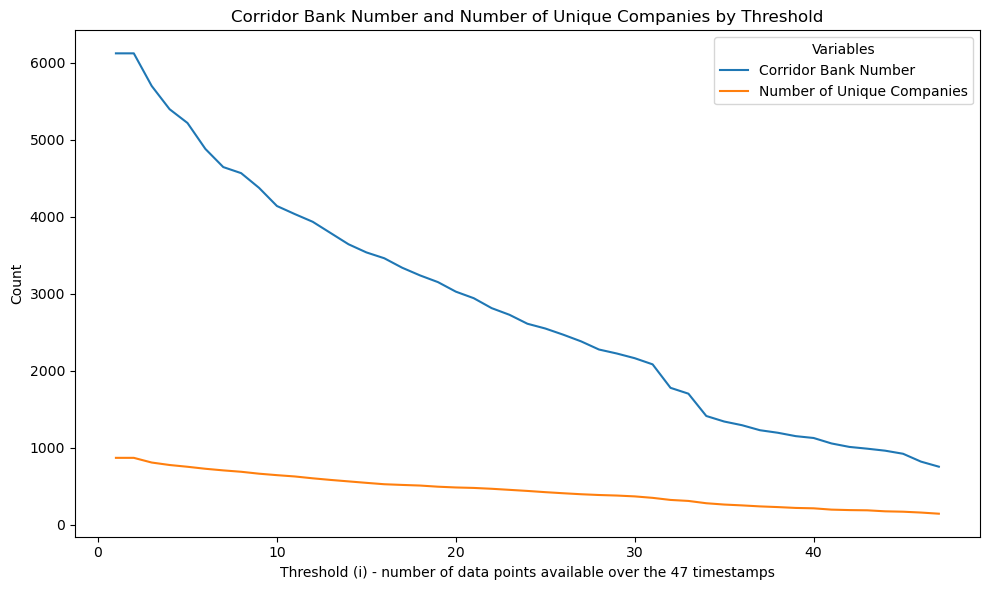

In [ ]:
index_range = range(1, len(corridor_bank_list) + 1)

# Create a DataFrame to hold the data

dffd = pd.DataFrame( {
    'Threshold (i)': list(index_range),
    'Corridor Bank Number': corridor_bank_list,
    'Number of Unique Companies': number_companies
})

# Melt the DataFrame so it's in long-form and suitable for seaborn's lineplot function
df_melted = dffd.melt('Threshold (i)', var_name='Variables', value_name='Counts')

# Now create a line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Threshold (i)', y='Counts', hue='Variables')
plt.title('Corridor Bank Number and Number of Unique Companies by Threshold')
plt.xlabel('Threshold (i) - number of data points available over the 47 timestamps')
plt.ylabel('Count')
plt.legend(title='Variables')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Threshold (i) - number of data points available over the 47 timestamps')

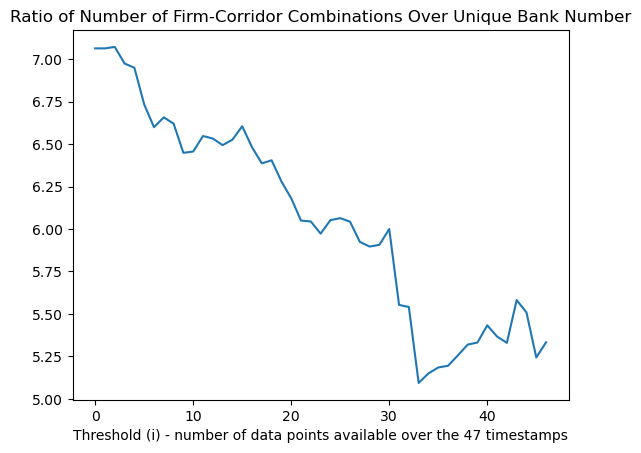

In [ ]:
dffd['Ratio'] = dffd['Corridor Bank Number']/dffd['Number of Unique Companies']
dffd['Ratio'].plot.line()
plt.title('Ratio of Number of Firm-Corridor Combinations Over Unique Bank Number')
plt.xlabel('Threshold (i) - number of data points available over the 47 timestamps')

In [ ]:
idx = pd.IndexSlice
df_pivoted_firm_timeseries.dropna(thresh=30, axis=1).loc[:, idx['AUTSRB', :]]

corridor   AUTSRB                                                
firm        Azimo Bank Austria Erste Bank MoneyGram Western Union
timestamp                                                        
2011-01-01    NaN          NaN        NaN       NaN           NaN
2011-07-01    NaN          NaN        NaN       NaN           NaN
2012-01-01    NaN          NaN        NaN       NaN           NaN
2012-07-01    NaN        13.12       4.88    7.8600     14.260000
2013-01-01    NaN        12.39       6.18    7.8600      8.570000
2013-04-01    NaN        12.51       3.54    7.8600      9.530000
2013-07-01    NaN        15.42       7.29    7.8600      6.070000
2013-10-01    NaN        15.37       7.29    7.8600      7.080000
2014-01-01    NaN        12.71       3.57    7.8600      5.480000
2014-04-01   1.97        12.21       3.57    7.8600      6.585000
2014-07-01   6.57        12.58       3.57    7.8600      8.035000
2014-10-01   3.57        14.63       3.57    7.8600      6.015000
2015-01-01   0.71        15.09       3.57    7.8600      6.595000
2015-04-01   3.57        12.57       3.57    7.8600      6.180000
2015-07-01   3.57        12.78       3.57    7.8600      7.160000
2015-10-01   3.57        12.41       7.43    7.8600      6.635000
2016-01-01   4.93        15.15       7.43    7.8600      6.700000
2016-04-01   6.55        12.50       7.43    7.8600      5.193333
2016-07-01   3.57        14.50       7.43    7.8600      6.770000
2016-10-01   3.57        14.86       7.43    7.8600      7.675000
2017-01-01   3.57        14.77       7.43    7.8600      7.220000
2017-04-01   3.57        14.89       7.43    7.8600      7.610000
2017-07-01    NaN        14.74       7.43    7.8600      6.885000
2017-10-01   3.57        14.47       7.43    7.8600      7.010000
2018-01-01   3.57        14.56       7.43    7.8600      8.165000
2018-04-01   3.56        14.95       7.43    6.6100      6.605000
2018-07-01   3.56        14.66       7.43    4.2850      6.035000
2018-10-01   3.56        12.47       7.43    4.2850      5.926667
2019-01-01   2.14        12.58       7.43    4.2850      5.926667
2019-04-01   2.14        12.38       7.43    7.6650      5.290000
2019-07-01   2.14        12.57       7.43    6.2800      5.692500
2019-10-01   2.14        12.45       7.43    6.2850      6.090000
2020-01-01   2.14        12.40       7.63    6.4250      5.990000
2020-04-01   2.14        12.41       7.63    6.4200      6.713333
2020-07-01   2.14        12.39       7.63    6.6300      6.706667
2020-10-01   2.14        12.56       7.63    6.6450      6.840000
2021-01-01   2.14        12.40       7.63    5.1500      6.613333
2021-04-01   2.14        24.83       4.71    5.0850      5.102500
2021-07-01   2.14        14.88      10.66    5.4650      3.966667
2021-10-01   2.14        14.70      10.66    5.4600      4.872500
2022-01-01   2.14        14.48      10.66    5.5300      3.920000
2022-04-01  12.40        14.68      10.66    5.4600      4.723333
2022-07-01  12.05        14.81      10.70    5.5800      3.953333
2022-10-01    NaN        16.85       3.25    4.4900      4.645000
2023-01-01    NaN        14.75       5.99    4.2325      4.682500
2023-04-01    NaN        10.72       5.99    4.3300      4.467500
2023-07-01    NaN        16.10       6.09    4.6650      4.487500

# Data Exploration

In [ ]:
bank_df_whole_no_cc2.isna().sum()

id                           0
period                       0
source_name                  0
source_region                0
source_income                0
source_lending               0
source_G8G20                 0
destination_name             0
destination_region           0
destination_income           0
destination_lending          0
destination_G8G20            0
firm                         0
firm_type                    0
speed actual                10
cc1 lcu amount             103
cc1 denomination amount     80
cc1 lcu code                 1
cc1 total cost %            12
inter lcu bank fx            0
transparent                  0
date                         0
corridor                     0
dtype: int64

                 id  cc1 lcu amount  cc1 denomination amount  \
count  2.051790e+05   205076.000000            205099.000000   
mean   5.075183e+08     6878.578155               199.999137   
std    4.433652e+08    37499.187775                 0.428525   
min    1.000000e+00       65.000000                 6.000000   
25%    3.241804e+06      140.000000               200.000000   
50%    5.132140e+08      200.000000               200.000000   
75%    9.272122e+08      260.000000               200.000000   
max    1.220195e+09   324500.000000               202.000000   

       cc1 total cost %  inter lcu bank fx  
count     205167.000000      205179.000000  
mean           7.045553         691.772983  
std            5.794497        3180.710422  
min          -58.920000           0.000000  
25%            3.400000           1.000000  
50%            5.500000          10.585900  
75%            8.930000          76.073700  
max          130.130000       32952.220000  


/Users/jacobzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


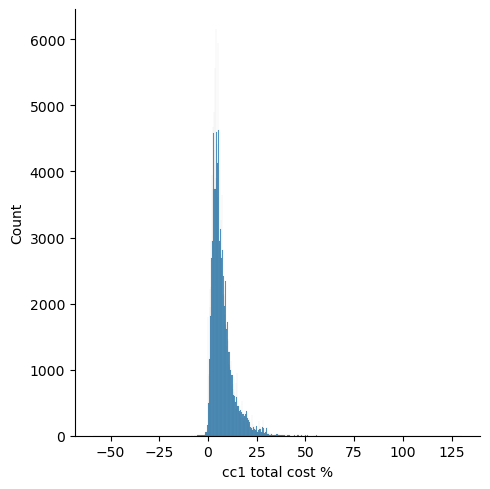

In [ ]:
print(bank_df_whole_no_cc2.describe())

sns.displot(bank_df_whole_no_cc2['cc1 total cost %'], kde= False)

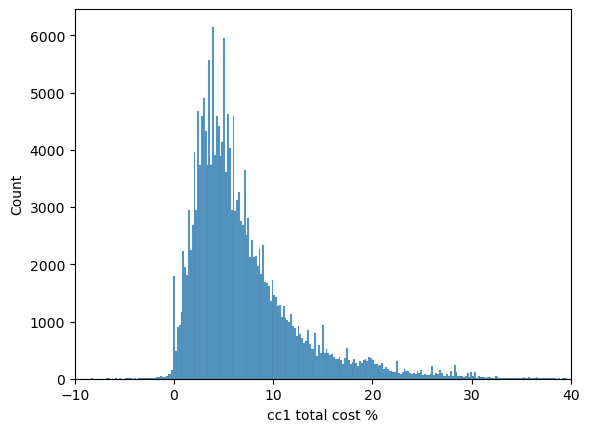

In [ ]:
fig, ax = plt.subplots()
sns.histplot(bank_df_whole_no_cc2['cc1 total cost %'], kde=False, ax=ax)
ax.set_xlim(-10, 40)  # Adjust the range as needed
plt.show()


<Axes: xlabel='cc1 total cost %'>

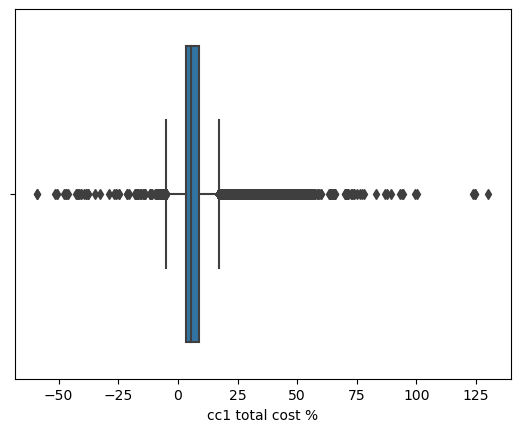

In [ ]:
sns.boxplot(x = bank_df_whole_no_cc2['cc1 total cost %'], orient='h')

## Create a time-series dataframe

In [ ]:
bank_df_whole_no_cc2.head()

,id,period,source_name,source_region,source_income,source_lending,source_G8G20,destination_name,destination_region,destination_income,...,firm_type,speed actual,cc1 lcu amount,cc1 denomination amount,cc1 lcu code,cc1 total cost %,inter lcu bank fx,transparent,date,corridor
0,13123,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Less than one hour,200.0,200.0,AUD,8.79,1.83024,yes,24/Jan/2011,AUSFJI
1,13129,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Less than one hour,200.0,200.0,AUD,9.42,1.83024,yes,24/Jan/2011,AUSFJI
2,13131,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Bank,3-5 days,200.0,200.0,AUD,11.00,1.00000,no,24/Jan/2011,AUSFJI
3,13128,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Same day,200.0,200.0,AUD,11.88,1.83024,yes,24/Jan/2011,AUSFJI
4,13127,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Bank,3-5 days,200.0,200.0,AUD,12.12,1.83024,yes,24/Jan/2011,AUSFJI


In [ ]:
bank_df_whole_no_cc2.shape

(205179, 23)

In [ ]:
time_series_df = bank_df_whole_no_cc2.drop(['date', 'id'], axis=1)
mean_df = time_series_df.groupby(['corridor', 'period'])['cc1 total cost %'].agg(['mean'])
iqr = time_series_df.groupby(['corridor', 'period'])['cc1 total cost %'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
).assign(IQR=lambda x: x['Q3'] - x['Q1'])

In [ ]:
iqr.drop(['Q1', 'Q3'], axis=1, inplace=True)

In [ ]:
iqr.reset_index()

,corridor,period,IQR
0,AGONAM,2016_2Q,6.6550
1,AGONAM,2016_3Q,10.7700
2,AGONAM,2016_4Q,2.1525
3,AGONAM,2017_1Q,5.9100
4,AGONAM,2017_2Q,3.1950
...,...,...,...
14758,ZAFZWE,2022_3Q,16.6150
14759,ZAFZWE,2022_4Q,4.1600
14760,ZAFZWE,2023_1Q,7.5750
14761,ZAFZWE,2023_2Q,7.6900


In [ ]:
time_series = pd.merge(mean_df.reset_index(), iqr.reset_index(), on=['corridor', 'period'])

In [ ]:
time_series.set_index(['corridor', 'period'], inplace= True)

In [ ]:
time_series

mean      IQR
corridor period                     
AGONAM   2016_2Q  19.323333   6.6550
         2016_3Q  19.390000  10.7700
         2016_4Q  26.757500   2.1525
         2017_1Q  26.296667   5.9100
         2017_2Q  24.673333   3.1950
...                     ...      ...
ZAFZWE   2022_3Q  13.878333  16.6150
         2022_4Q  12.237209   4.1600
         2023_1Q  12.476744   7.5750
         2023_2Q  13.497949   7.6900
         2023_3Q  12.893437   7.9325

[14763 rows x 2 columns]

In [ ]:
def period_to_datetime(period):
    year, quarter = period.split('_')
    month = (int(quarter[1]) - 1) * 3 + 1
    return pd.Timestamp(year=int(year), month=month, day=1)

In [ ]:
def period_to_datetime(period):
    year, quarter = period.split('_')
    month = (int(quarter[1]) - 1) * 3 + 1
    return pd.Timestamp(year=int(year), month=month, day=1)


In [ ]:
pivoted_mean = mean_df.reset_index().pivot(index='period', columns='corridor', values='mean')
pivoted_iqr = iqr.reset_index().pivot(index='period', columns='corridor', values='IQR')


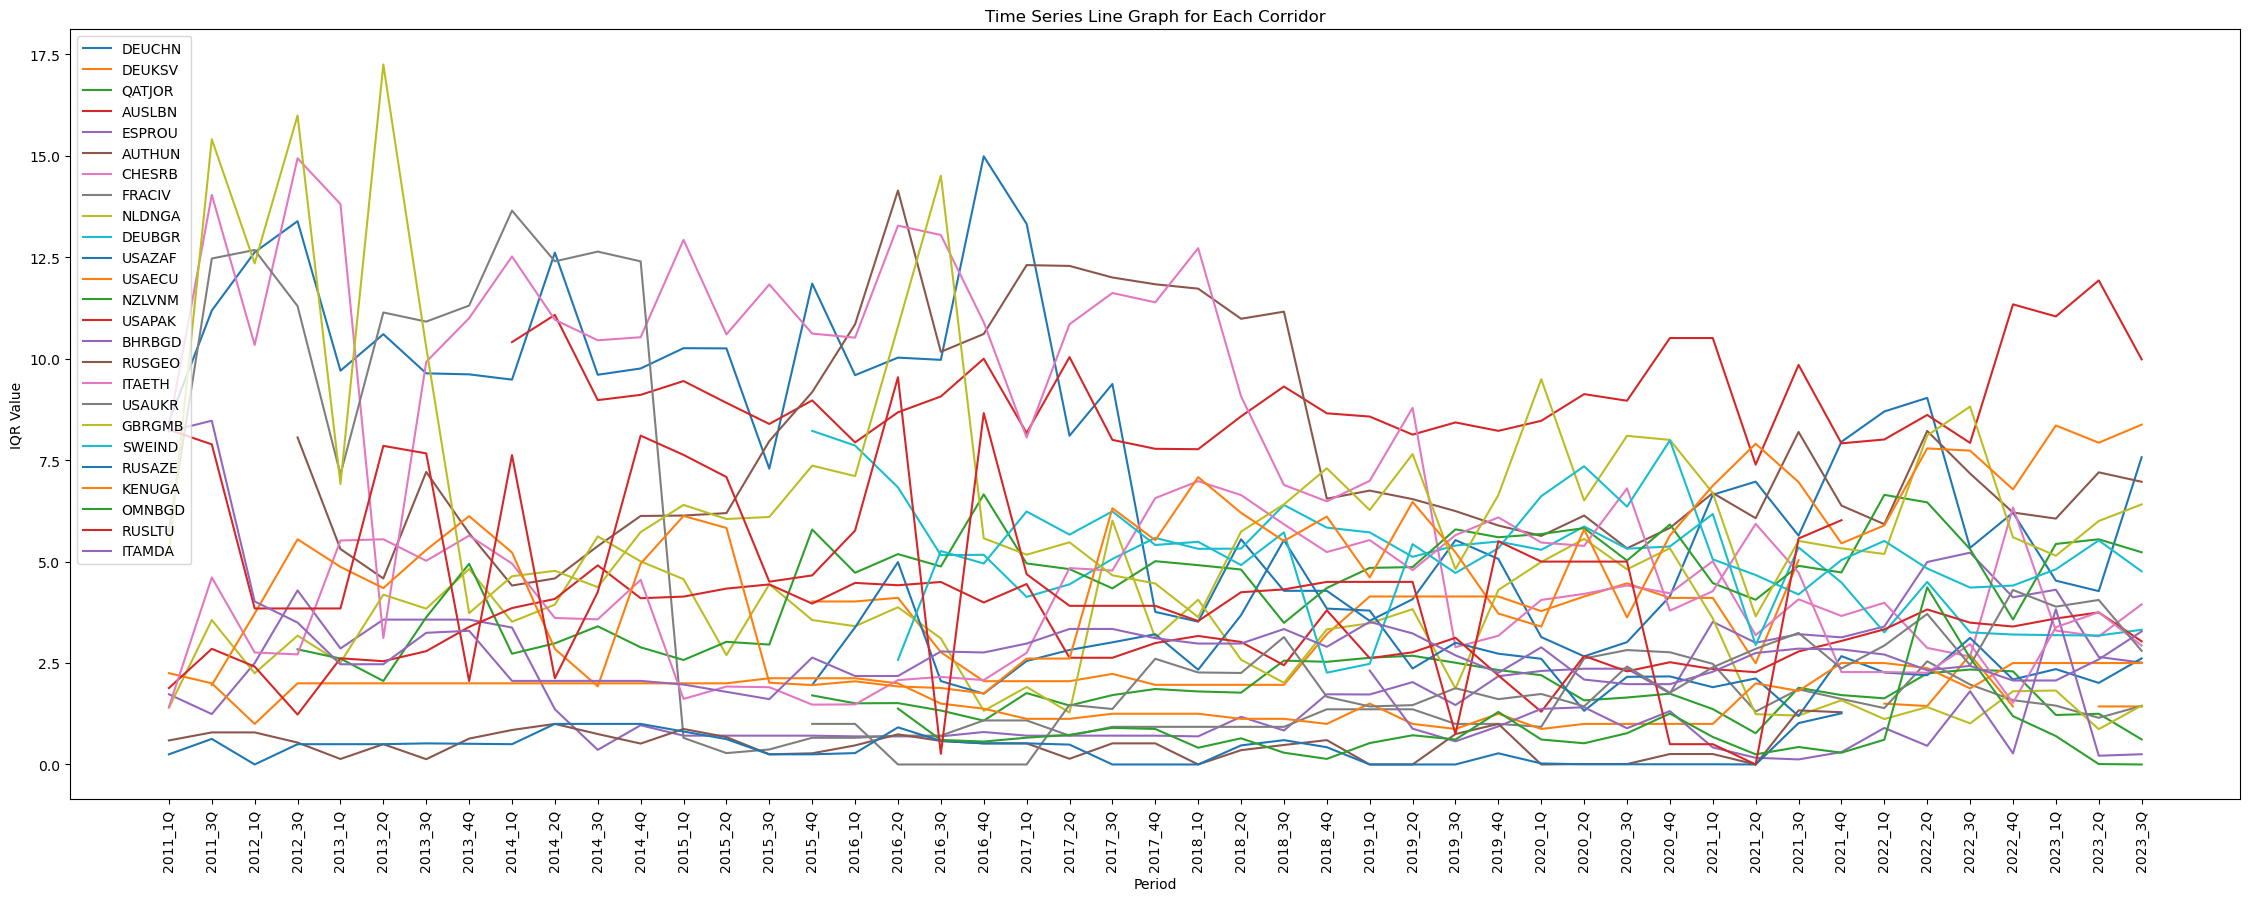

In [ ]:
pivoted = pivoted_iqr
# Plot the time series for each corridor
from random import sample 
plt.figure(figsize=(28, 10))
for corridor in sample(list(pivoted.columns), 25):
    plt.plot(pivoted.index, pivoted[corridor], label=corridor)

plt.title('Time Series Line Graph for Each Corridor')
plt.xlabel('Period')
plt.xticks(rotation=90)
plt.ylabel('IQR Value')
plt.legend(loc='best')
plt.show()

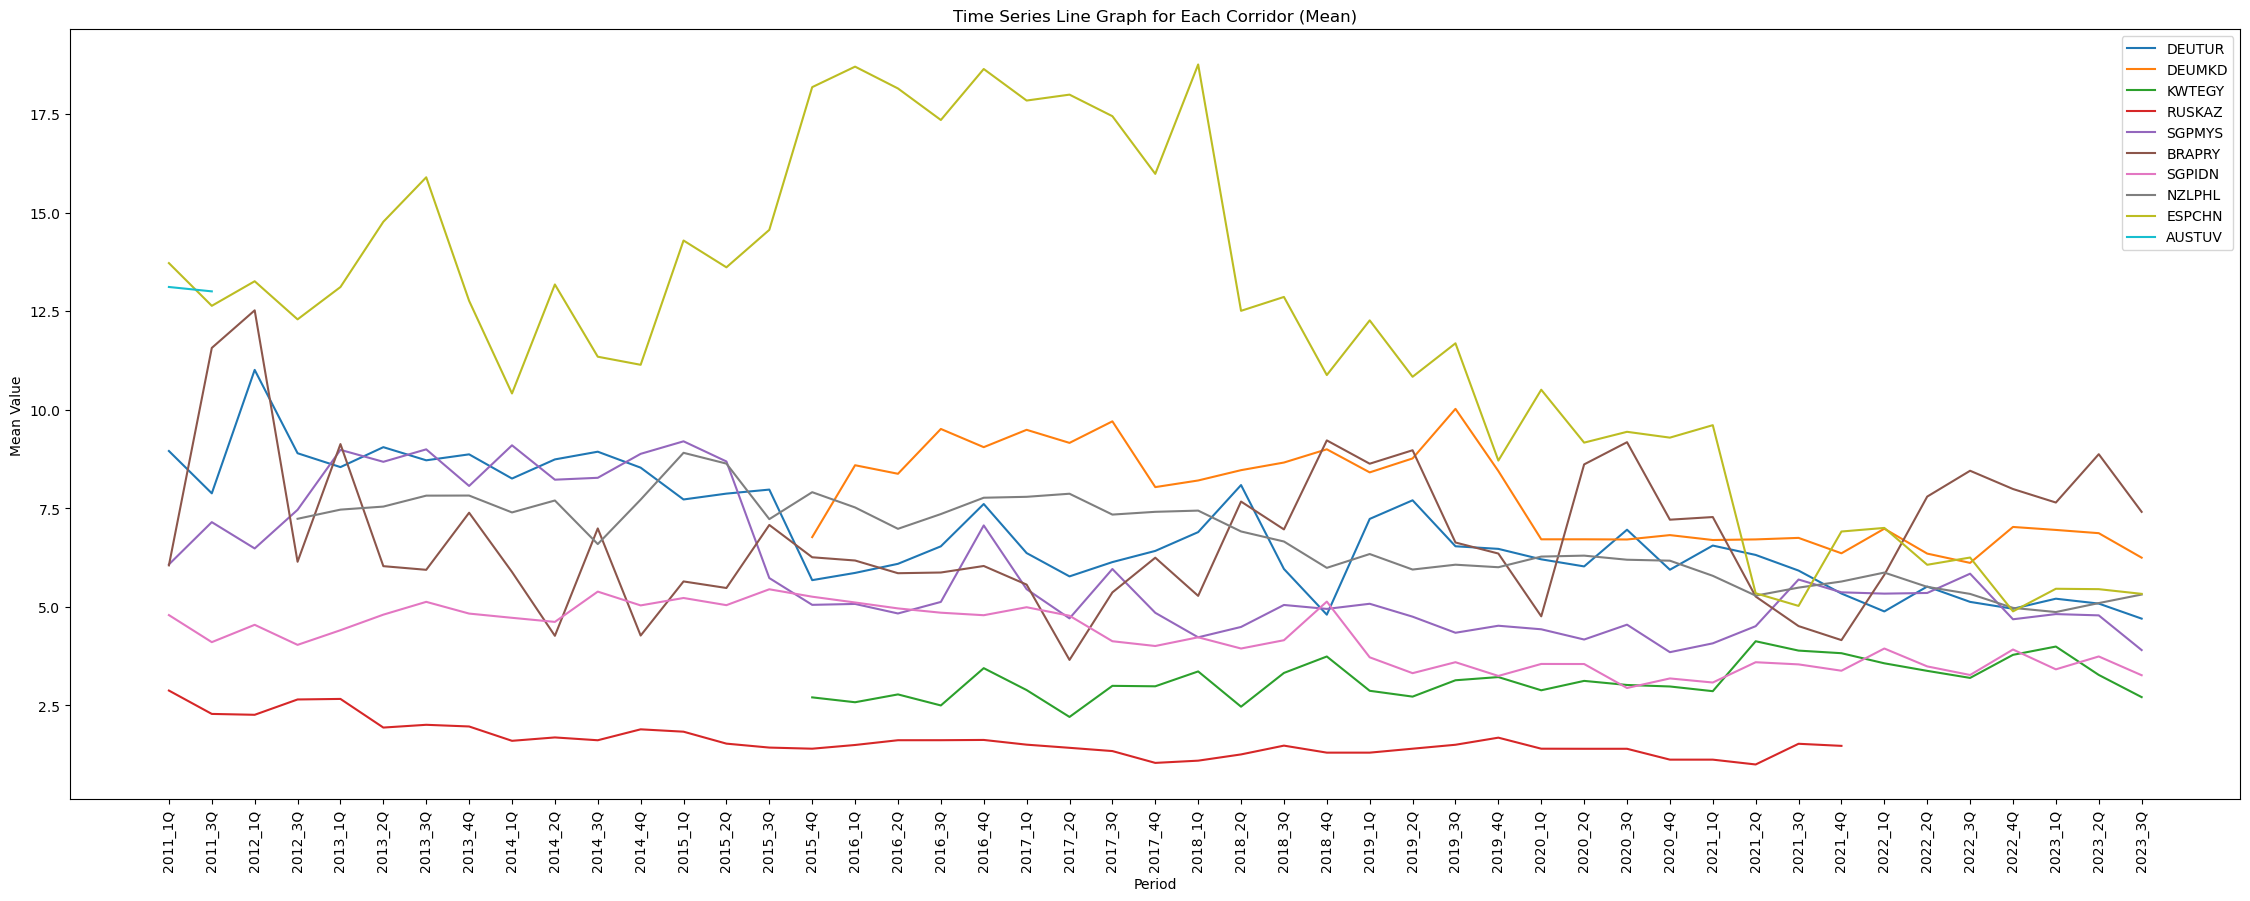

In [ ]:
pivoted = pivoted_mean
# Plot the time series for each corridor
from random import sample 
plt.figure(figsize=(28, 10))
for corridor in sample(list(pivoted.columns), 10):
    plt.plot(pivoted.index, pivoted[corridor], label=corridor)

plt.title('Time Series Line Graph for Each Corridor (Mean)')
plt.xlabel('Period')
plt.xticks(rotation=90)
plt.ylabel('Mean Value')
plt.legend(loc='best')
plt.show()

In [ ]:
(pivoted_mean.isnull().sum(axis=0)/pivoted_mean.shape[0]).value_counts().sort_index()

0.000000    176
0.021277     14
0.042553      3
0.063830     11
0.085106      2
0.148936     13
0.170213      6
0.276596      1
0.319149     69
0.340426      1
0.361702     63
0.382979      1
0.404255      1
0.425532      1
0.574468      3
0.595745      2
0.680851      1
0.914894      1
0.957447     12
Name: count, dtype: int64

In [ ]:
pivoted_iqr.dropna(thresh=int(47*0.9), axis='columns').shape

(47, 206)

In [ ]:
pivoted_iqr.shape

(47, 381)

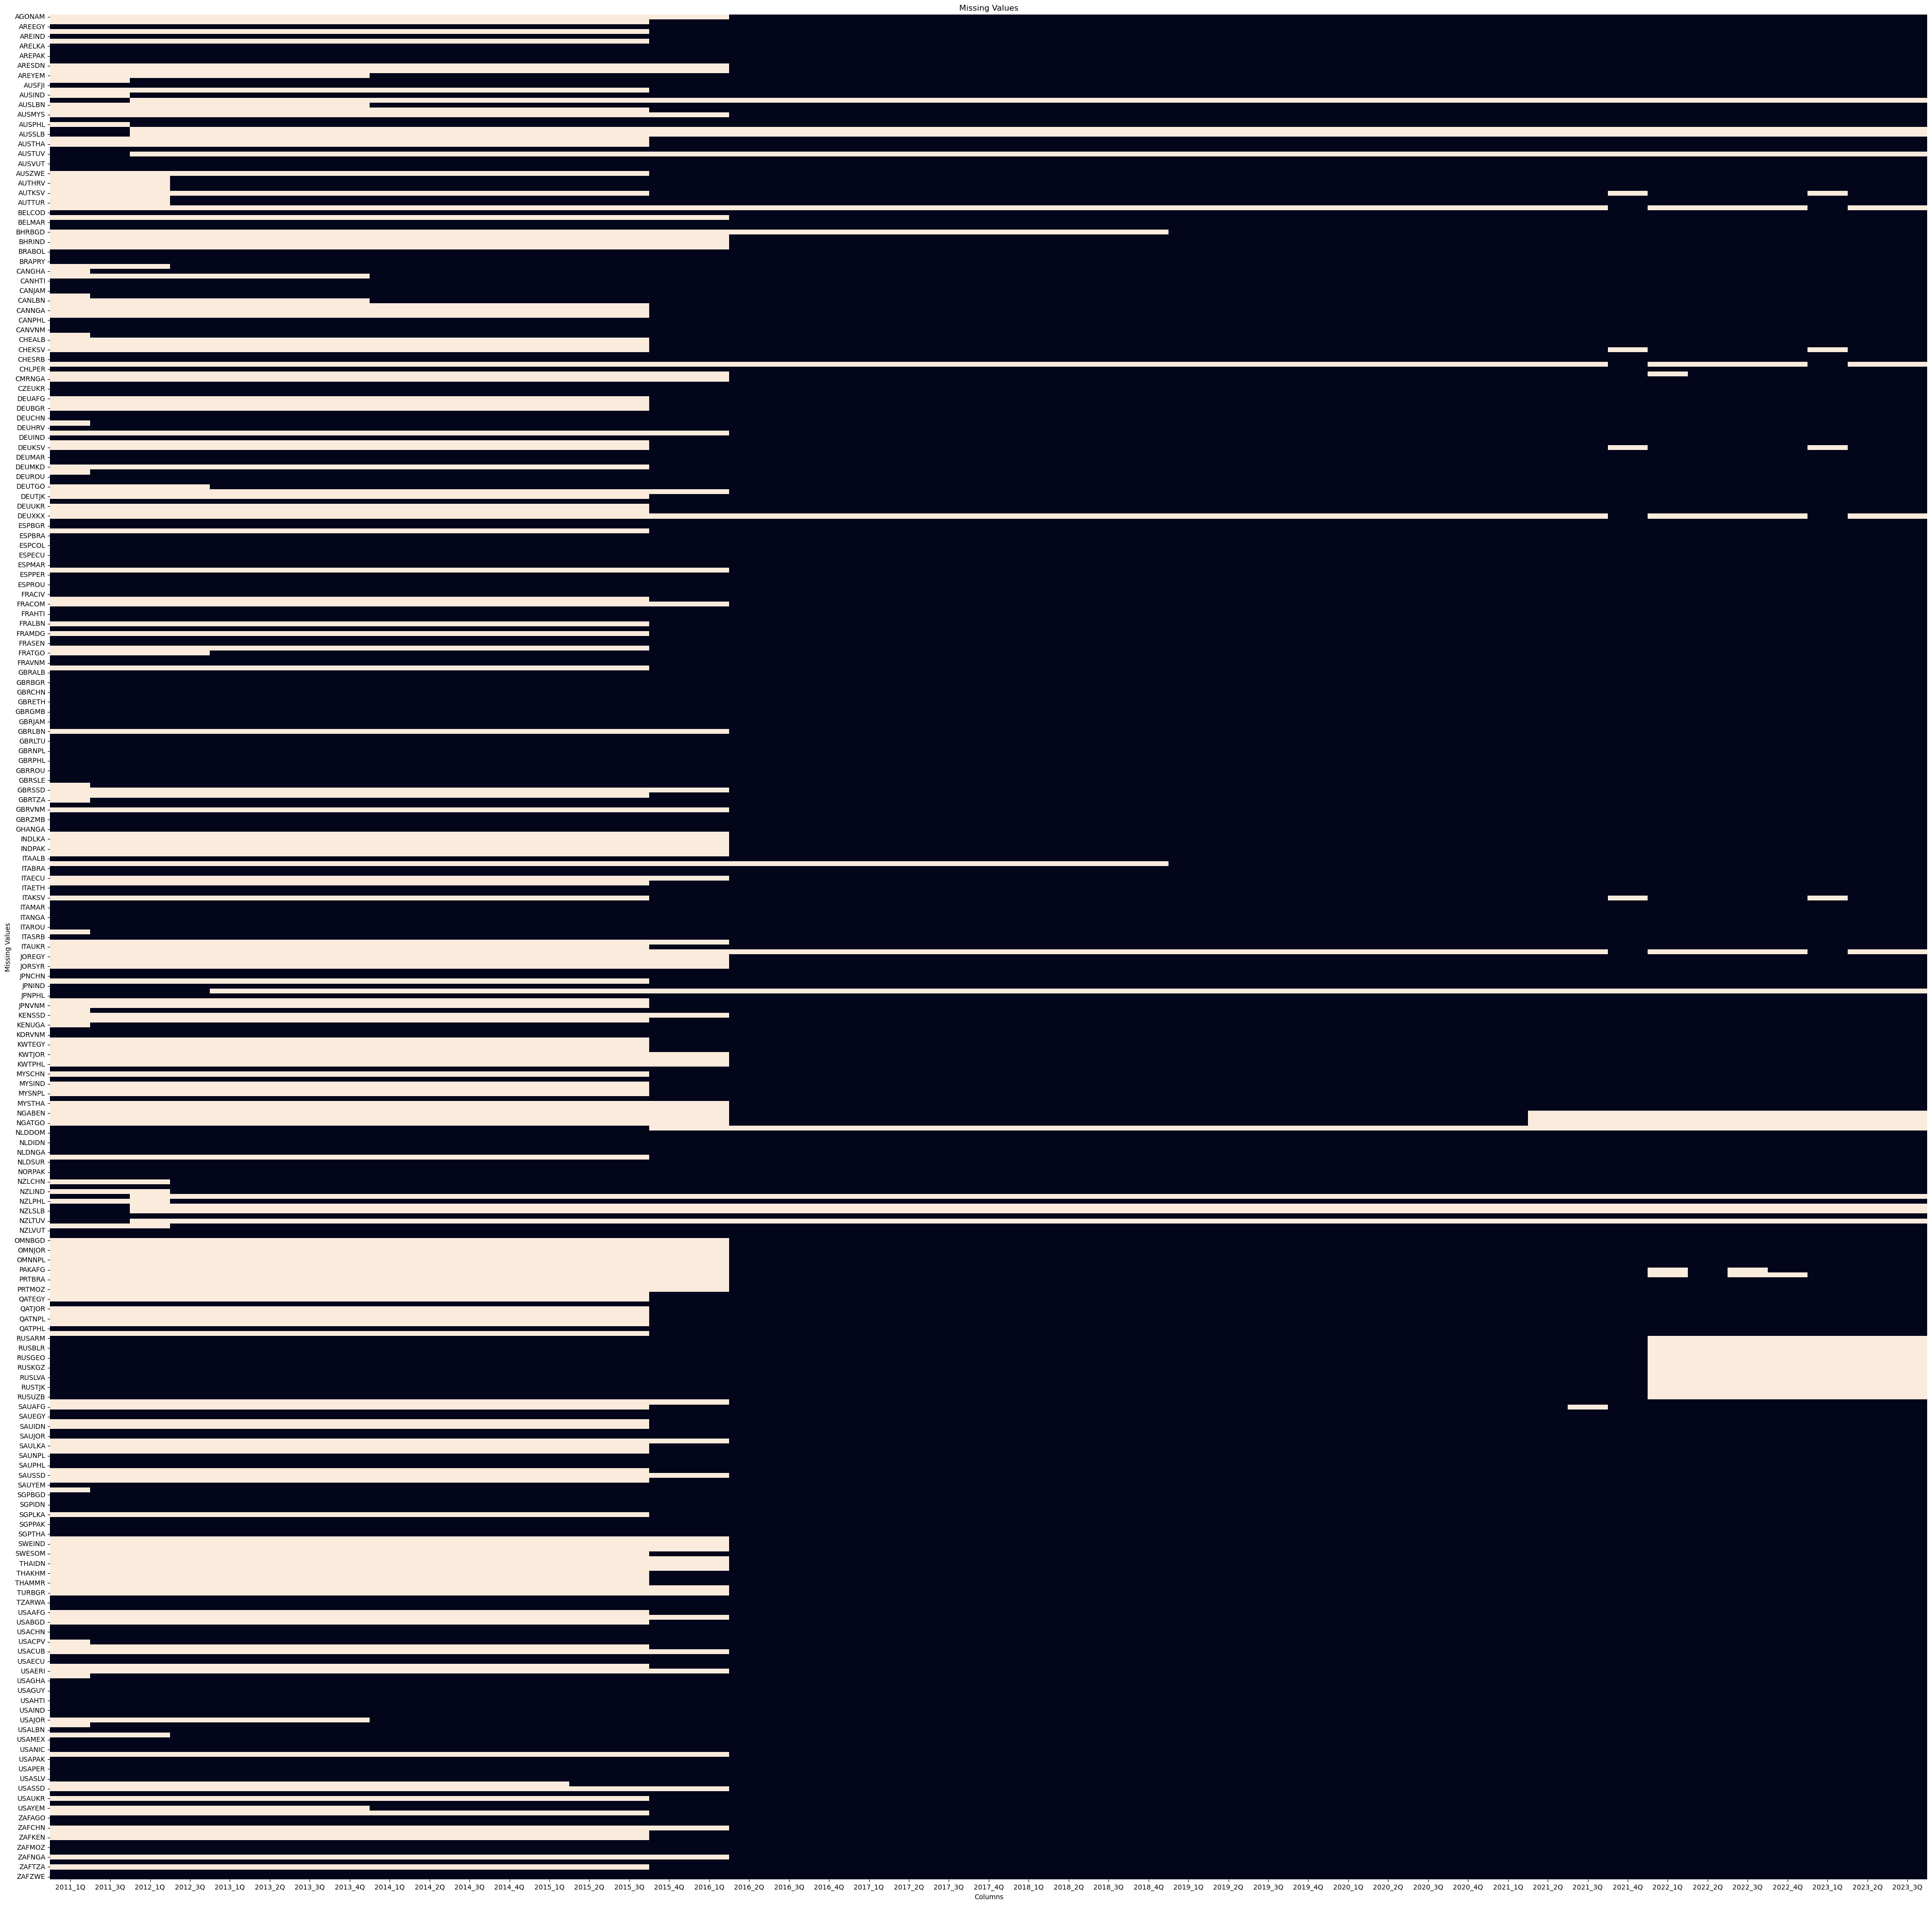

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))

sns.heatmap(pivoted_mean.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10) 
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

In [ ]:
pivoted_mean.to_csv('pivoted_mean.csv', index=False)

In [ ]:
# Define a function to count the number of missing segments per column with a minimum segment length of 3
# Segments starting from the first value of the column are not counted, and only non-initial segments are considered
def count_missing_segments_per_column_custom(data, min_segment_length=1):
    missing_segments_counts = {}
    for column in data.columns:
        segments_count = 0
        current_segment_length = 0
        # Start with True if the first value is NaN, meaning we will not count the initial segment if it exists
        in_initial_segment = pd.isna(data[column].iloc[0])
        for value in data[column]:
            if pd.isna(value):
                current_segment_length += 1
            else:
                if current_segment_length >= min_segment_length and not in_initial_segment:
                    segments_count += 1
                current_segment_length = 0
                in_initial_segment = False  # Any segment now is not the initial one anymore
        # Check if the last segment in the column should be counted and it's not the initial segment
        if current_segment_length >= min_segment_length and not in_initial_segment:
            segments_count += 1
        missing_segments_counts[column] = segments_count
    return missing_segments_counts

# Count the number of missing segments for each column with the specified minimum segment length
# Do not count the initial segment if it starts from the very first value
missing_segments_counts_columns_custom = count_missing_segments_per_column_custom(pivoted_iqr.dropna(thresh=0.9, axis='columns'))

# Convert the result to a DataFrame for better visualization
missing_segments_columns_custom_df = pd.DataFrame(
    list(missing_segments_counts_columns_custom.items()),
    columns=['Column', 'Missing Segments']
)

# Sort the DataFrame based on the number of missing segments in descending order to see the columns with the most segments
sorted_missing_segments_columns_custom_df = missing_segments_columns_custom_df.sort_values(
    by='Missing Segments', ascending=False
)

# Display the top columns with the most missing segments excluding the initial segment
sorted_missing_segments_columns_custom_df.head(10)


,Column,Missing Segments
71,CHEXKX,2
102,DEUXKX,2
257,PAKBGD,2
68,CHEKSV,2
191,ITAXKX,2
39,AUTXKX,2
256,PAKAFG,2
88,DEUKSV,2
36,AUTKSV,2
180,ITAKSV,2


In [ ]:
sorted_missing_segments_columns_custom_df['Missing Segments'].value_counts()

Missing Segments
0    343
1     28
2     10
Name: count, dtype: int64

# The rest

In [ ]:
bank_df_whole_no_cc2

,id,period,source_name,source_region,source_income,source_lending,source_G8G20,destination_name,destination_region,destination_income,...,firm_type,speed actual,cc1 lcu amount,cc1 denomination amount,cc1 lcu code,cc1 total cost %,inter lcu bank fx,transparent,date,corridor
0,13123,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Less than one hour,200.0,200.0,AUD,8.79,1.83024,yes,24/Jan/2011,AUSFJI
1,13129,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Less than one hour,200.0,200.0,AUD,9.42,1.83024,yes,24/Jan/2011,AUSFJI
2,13131,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Bank,3-5 days,200.0,200.0,AUD,11.00,1.00000,no,24/Jan/2011,AUSFJI
3,13128,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Same day,200.0,200.0,AUD,11.88,1.83024,yes,24/Jan/2011,AUSFJI
4,13127,2011_1Q,Australia,..,High income: OECD,..,G20,Fiji,East Asia & Pacific,Upper middle income,...,Bank,3-5 days,200.0,200.0,AUD,12.12,1.83024,yes,24/Jan/2011,AUSFJI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155683,1120234566,2023_3Q,Malaysia,East Asia & Pacific,Upper middle income,IBRD,..,Thailand,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Less than one hour,610.0,200.0,MYR,9.93,7.59760,yes,12/Sep/2023,MYSTHA
155684,1120237456,2023_3Q,Malaysia,East Asia & Pacific,Upper middle income,IBRD,..,Indonesia,East Asia & Pacific,Upper middle income,...,Money Transfer Operator,Less than one hour,610.0,200.0,MYR,2.85,3279.83320,yes,12/Sep/2023,MYSIDN
155685,1120231791,2023_3Q,Australia,..,High income,..,G20,Vietnam,East Asia & Pacific,Lower middle income,...,Bank,2 days,200.0,200.0,AUD,8.99,15499.91630,yes,12/Sep/2023,AUSVNM
155686,1120231823,2023_3Q,Australia,..,High income,..,G20,Vanuatu,East Asia & Pacific,Lower middle income,...,Bank,2 days,200.0,200.0,AUD,4.16,77.82340,yes,12/Sep/2023,AUSVUT


In [ ]:
import pandas as pd
 # Original column names
original_names = ['cc1 lcu amount', 'cc1 total cost %']

# New column names
new_names = ['local_amount', 'total_cost_percent']

# Create a dictionary with old column names as keys and new column names as values
column_name_dict = dict(zip(original_names, new_names))

# Use the rename function and update the column names
bank_df_whole_no_cc2.rename(columns=column_name_dict , inplace=True)

print(bank_df_whole_no_cc2)


                id   period source_name        source_region  \
0            13123  2011_1Q   Australia                   ..   
1            13129  2011_1Q   Australia                   ..   
2            13131  2011_1Q   Australia                   ..   
3            13128  2011_1Q   Australia                   ..   
4            13127  2011_1Q   Australia                   ..   
...            ...      ...         ...                  ...   
155683  1120234566  2023_3Q    Malaysia  East Asia & Pacific   
155684  1120237456  2023_3Q    Malaysia  East Asia & Pacific   
155685  1120231791  2023_3Q   Australia                   ..   
155686  1120231823  2023_3Q   Australia                   ..   
155687  1120231881  2023_3Q      Canada                   ..   

              source_income source_lending source_G8G20 destination_name  \
0         High income: OECD             ..          G20             Fiji   
1         High income: OECD             ..          G20             Fiji   
2  

/var/folders/k8/ltw6mcfj23ndd4m6h12lm7fh0000gn/T/ipykernel_18815/2889974137.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_whole_no_cc2.rename(columns=column_name_dict , inplace=True)


In [ ]:
bank_df_whole_no_cc2.isna().sum(axis=0)

id                           0
period                       0
source_name                  0
source_region                0
source_income                0
source_lending               0
source_G8G20                 0
destination_name             0
destination_region           0
destination_income           0
destination_lending          0
destination_G8G20            0
firm                         0
firm_type                    0
speed actual                10
local_amount               103
cc1 denomination amount     80
cc1 lcu code                 1
total_cost_percent          12
inter lcu bank fx            0
transparent                  0
date                         0
corridor                     0
dtype: int64

In [ ]:
bank_df_whole_no_cc2.describe()

,id,local_amount,cc1 denomination amount,total_cost_percent,inter lcu bank fx
count,2.051790e+05,205076.000000,205099.000000,205167.000000,205179.000000
mean,5.075183e+08,6878.578155,199.999137,7.045553,691.772983
std,4.433652e+08,37499.187775,0.428525,5.794497,3180.710422
min,1.000000e+00,65.000000,6.000000,-58.920000,0.000000
25%,3.241804e+06,140.000000,200.000000,3.400000,1.000000
50%,5.132140e+08,200.000000,200.000000,5.500000,10.585900
75%,9.272122e+08,260.000000,200.000000,8.930000,76.073700
max,1.220195e+09,324500.000000,202.000000,130.130000,32952.220000


In [ ]:
print(bank_df_whole_no_cc2.shape)

(205179, 23)


In [ ]:
import pandas as pd

# Assuming bank_df_whole is your DataFrame
threshold = len(bank_df_whole) * 0.8  # Define threshold for 80%
bank_df_whole = bank_df_whole.dropna(thresh=threshold, axis=1)


bank_df_whole.isna().sum(axis=0)

id                            0
period                        0
source_code                   0
source_name                   0
source_region                 0
source_income                 0
source_lending                0
source_G8G20                  0
destination_code              0
destination_name              0
destination_region            0
destination_income            0
destination_lending           0
destination_G8G20             0
firm                          0
firm_type                     0
speed actual                 10
cc1 lcu amount              103
cc1 denomination amount      80
cc1 lcu code                  1
cc1 lcu fee                  23
cc1 lcu fx rate              16
cc1 fx margin                13
cc1 total cost %             12
cc2 lcu amount                1
cc2 denomination amount      78
cc2 lcu code                  4
cc2 lcu fee                 999
cc2 lcu fx rate            1086
cc2 fx margin               977
cc2 total cost %            978
inter lc

In [ ]:
bank_df_whole.dtypes

id                           int64
period                      object
source_code                 object
source_name                 object
source_region               object
source_income               object
source_lending              object
source_G8G20                object
destination_code            object
destination_name            object
destination_region          object
destination_income          object
destination_lending         object
destination_G8G20           object
firm                        object
firm_type                   object
speed actual                object
cc1 lcu amount             float64
cc1 denomination amount    float64
cc1 lcu code                object
cc1 lcu fee                float64
cc1 lcu fx rate            float64
cc1 fx margin              float64
cc1 total cost %           float64
cc2 lcu amount             float64
cc2 denomination amount    float64
cc2 lcu code                object
cc2 lcu fee                float64
cc2 lcu fx rate     

In [ ]:
bank_df_whole.shape

(205179, 35)

In [ ]:
bank_df_whole.head()

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 denomination amount,cc2 lcu code,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,date,corridor
0,13123,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,500.0,AUD,10.0,1.770000,3.29,5.29,1.83024,yes,24/Jan/2011,AUSFJI
1,13129,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,500.0,AUD,12.0,1.767737,3.42,5.82,1.83024,yes,24/Jan/2011,AUSFJI
2,13131,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,500.0,AUD,22.0,1.000000,0.00,4.40,1.00000,no,24/Jan/2011,AUSFJI
3,13128,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,500.0,AUD,15.0,1.750000,4.38,7.38,1.83024,yes,24/Jan/2011,AUSFJI
4,13127,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,500.0,AUD,20.0,1.791400,2.12,6.12,1.83024,yes,24/Jan/2011,AUSFJI


In [ ]:
bank_df_whole.describe()

,id,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx
count,2.051790e+05,205076.000000,205099.000000,205156.000000,205163.000000,205166.000000,205167.000000,205178.000000,205101.000000,204180.000000,204093.000000,204202.000000,204201.000000,205179.000000
mean,5.075183e+08,6878.578155,199.999137,628.589041,673.487101,2.022764,7.045553,17106.323182,500.000210,729.306236,673.230989,2.019106,4.528029,691.772983
std,4.433652e+08,37499.187775,0.428525,6051.490124,3096.505511,2.598781,5.794497,93338.502077,0.019872,6431.327613,3095.840692,2.584103,3.553151,3180.710422
min,1.000000e+00,65.000000,6.000000,0.000000,0.000300,-67.480000,-58.920000,0.000000,500.000000,0.000000,0.000300,-67.480000,-60.810000,0.000000
25%,3.241804e+06,140.000000,200.000000,4.000000,1.000000,0.190000,3.400000,345.000000,500.000000,4.500000,1.000000,0.190000,2.020000,1.000000
50%,5.132140e+08,200.000000,200.000000,8.000000,10.287200,1.400000,5.500000,500.000000,500.000000,10.000000,10.238000,1.390000,3.630000,10.585900
75%,9.272122e+08,260.000000,200.000000,17.000000,73.762790,3.000000,8.930000,650.000000,500.000000,20.770000,73.695700,2.990000,6.170000,76.073700
max,1.220195e+09,324500.000000,202.000000,200122.000000,32223.950600,53.770000,130.130000,811000.000000,503.000000,344537.000000,32223.950600,53.770000,57.320000,32952.220000


In [ ]:
bank_df_whole.isna().sum(axis=0)

id                            0
period                        0
source_code                   0
source_name                   0
source_region                 0
source_income                 0
source_lending                0
source_G8G20                  0
destination_code              0
destination_name              0
destination_region            0
destination_income            0
destination_lending           0
destination_G8G20             0
firm                          0
firm_type                     0
speed actual                 10
cc1 lcu amount              103
cc1 denomination amount      80
cc1 lcu code                  1
cc1 lcu fee                  23
cc1 lcu fx rate              16
cc1 fx margin                13
cc1 total cost %             12
cc2 lcu amount                1
cc2 denomination amount      78
cc2 lcu code                  4
cc2 lcu fee                 999
cc2 lcu fx rate            1086
cc2 fx margin               977
cc2 total cost %            978
inter lc

In [ ]:
bank_df_whole.drop('id', axis=1, inplace=True)
bank_df_whole.select_dtypes(include='number').columns

Index(['cc1 lcu amount', 'cc1 denomination amount', 'cc1 lcu fee',
       'cc1 lcu fx rate', 'cc1 fx margin', 'cc1 total cost %',
       'cc2 lcu amount', 'cc2 denomination amount', 'cc2 lcu fee',
       'cc2 lcu fx rate', 'cc2 fx margin', 'cc2 total cost %',
       'inter lcu bank fx'],
      dtype='object')

In [ ]:
bank_df_whole.describe()

,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx
count,205076.000000,205099.000000,205156.000000,205163.000000,205166.000000,205167.000000,205178.000000,205101.000000,204180.000000,204093.000000,204202.000000,204201.000000,205179.000000
mean,6878.578155,199.999137,628.589041,673.487101,2.022764,7.045553,17106.323182,500.000210,729.306236,673.230989,2.019106,4.528029,691.772983
std,37499.187775,0.428525,6051.490124,3096.505511,2.598781,5.794497,93338.502077,0.019872,6431.327613,3095.840692,2.584103,3.553151,3180.710422
min,65.000000,6.000000,0.000000,0.000300,-67.480000,-58.920000,0.000000,500.000000,0.000000,0.000300,-67.480000,-60.810000,0.000000
25%,140.000000,200.000000,4.000000,1.000000,0.190000,3.400000,345.000000,500.000000,4.500000,1.000000,0.190000,2.020000,1.000000
50%,200.000000,200.000000,8.000000,10.287200,1.400000,5.500000,500.000000,500.000000,10.000000,10.238000,1.390000,3.630000,10.585900
75%,260.000000,200.000000,17.000000,73.762790,3.000000,8.930000,650.000000,500.000000,20.770000,73.695700,2.990000,6.170000,76.073700
max,324500.000000,202.000000,200122.000000,32223.950600,53.770000,130.130000,811000.000000,503.000000,344537.000000,32223.950600,53.770000,57.320000,32952.220000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



# Separate the features and the target variable
X = bank_df_whole.drop(['local_amount'], axis=1)  # Assuming 'local_amount' is the target
y = bank_df_whole['local_amount']

# List of categorical columns to be one-hot encoded
categorical_columns = [#'source_code', 
                       'source_region', 'source_income', 
                       'source_lending', 'source_G8G20', 
                       #'destination_code', 
                       'destination_region', 'destination_income', 'destination_lending', 
                       'destination_G8G20', 'firm_type', 'speed actual', 
                       'transparent']

numerical_columns = ['local_amount', 'local_fee', 'FX_Rate', 'inter lcu bank fx', 'FX_Margin']


# Assuming 'local_amount' is the target variable
y = bank_df_whole['total_cost_percent']

# Keep only the defined categorical and numerical columns
X = bank_df_whole[categorical_columns + numerical_columns]

# Assuming X_train and y_train are your features and target variable for training

# Remove rows where the target is NaN
valid_indices = y.notna()  # Indices of rows where y_train is not NaN
X = X[valid_indices]
y = y[valid_indices]

# Now, you can proceed with cross-validation using the cleaned datasets


# Assuming `y` is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['local_amount'] not found in axis"

In [ ]:
bank_df_whole = bank_df_whole.drop(bank_df_whole.loc[bank_df_whole['total_cost_percent']<0].index)

# Assuming 'local_amount' is the target variable
y = bank_df_whole['total_cost_percent']

# Keep only the defined categorical and numerical columns
X = bank_df_whole[categorical_columns + numerical_columns]

# Assuming X_train and y_train are your features and target variable for training

# Remove rows where the target is NaN
valid_indices = y.notna()  # Indices of rows where y_train is not NaN
X = X[valid_indices]
y = y[valid_indices]
y = np.log1p(y)
# Now, you can proceed with cross-validation using the cleaned datasets


# Assuming `y` is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
# Define the preprocessing for categorical columns (one-hot encoding)
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Define the preprocessing for numerical columns (log transformation followed by scaling)
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median,  # Apply the log transformation with offset
    ('scaler', StandardScaler())  # Scale the data
])

# Create the column transformer with both categorical and numerical preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_columns),
        ('num', numerical_preprocessor, numerical_columns)
    ]
)

# Create the Ridge regression model pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=3.0))
])


In [ ]:
print(y_train.shape)
X_train.shape

(163172,)


(163172, 16)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error

# Define a cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for R^2
r2_scores = cross_val_score(ridge_pipeline, X_train, y_train, cv=cv, scoring='r2')

# Print out R^2 scores for each fold
print("R^2 scores for each fold:", r2_scores)
print("Average R^2 score:", np.mean(r2_scores))


R^2 scores for each fold: [0.45963546 0.46532445 0.46621891 0.4572639  0.45717723]
Average R^2 score: 0.46112399000596926


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming ridge_pipeline is already defined and fitted if necessary

# Get out-of-sample predictions
y_pred_cv = cross_val_predict(ridge_pipeline, X_train, y_train, cv=cv)

# Calculate RMSE for cross-validation
rmse_cv = sqrt(mean_squared_error(y_train, y_pred_cv))

# Print out RMSE score for cross-validation
print("Cross-validated RMSE:", rmse_cv)


Cross-validated RMSE: 0.46792976633135225


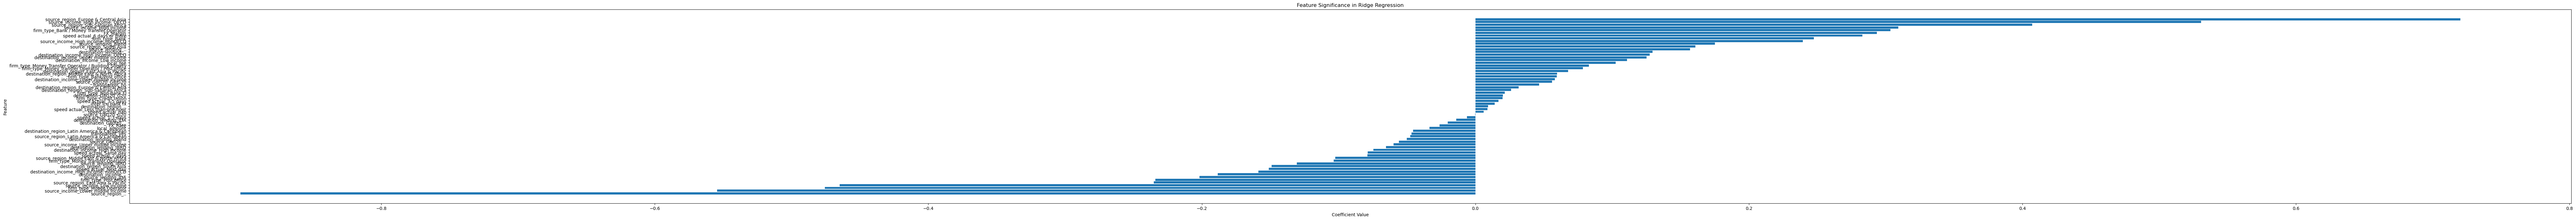

In [ ]:
# Assuming `ridge_pipeline` is your fitted pipeline
# Define your pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=3.0))
])

# Fit your pipeline
ridge_pipeline.fit(X_train, y_train)

# Access the coefficients
ridge_model = ridge_pipeline.named_steps['model']
coefficients = ridge_model.coef_



# Extract feature names from the ColumnTransformer
feature_names = []

# Get the one-hot encoder and its feature names
if 'preprocessor' in ridge_pipeline.named_steps:
    preprocessor = ridge_pipeline.named_steps['preprocessor']
    cat_processor = preprocessor.named_transformers_['cat']
    cat_features = cat_processor.get_feature_names_out(input_features=categorical_columns)
    feature_names.extend(cat_features)

# Add numerical feature names directly since they are not transformed in this example
feature_names.extend(numerical_columns)

# Make sure the length matches
assert len(feature_names) == len(coefficients)
import matplotlib.pyplot as plt
import numpy as np

# Sort the coefficients and their corresponding feature names
sorted_idx = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Create a horizontal bar chart
plt.figure(figsize=(100, 8))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Significance in Ridge Regression')
plt.show()


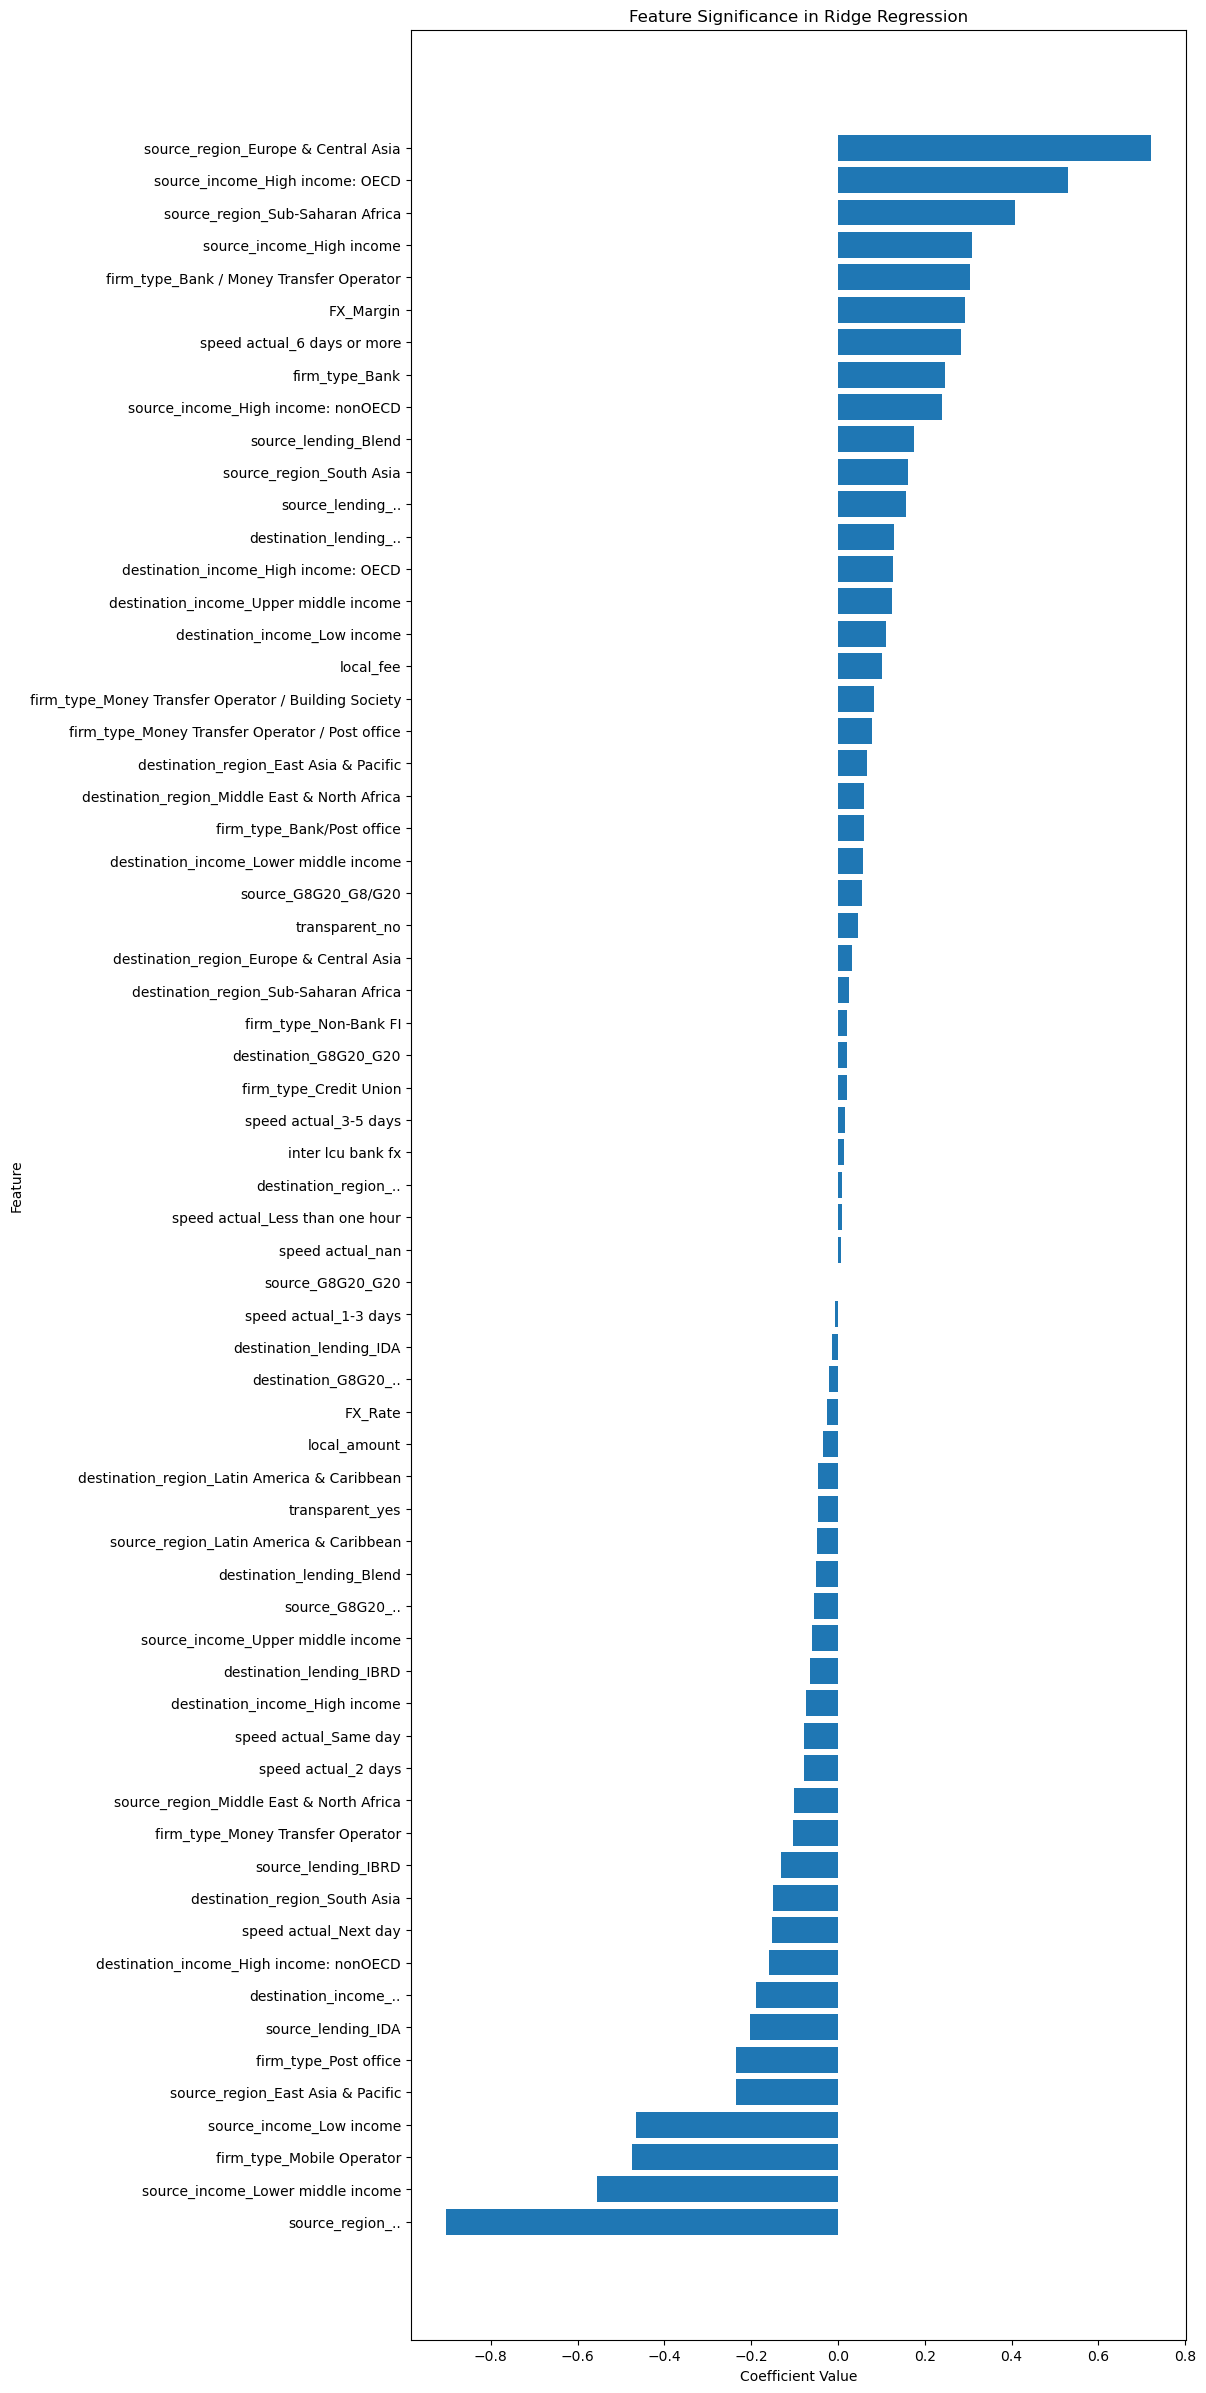

In [ ]:

# Create a horizontal bar chart
plt.figure(figsize=(10, 30))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Significance in Ridge Regression')
plt.show()

# Interbank exchange rate